## 5.1. Univariate Regression

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("Data\winequality-red.csv")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_12876\1194014973.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("Data\winequality-red.csv")


### 5.1.1. Fitting the Model

Fit a linear regression model using a single predictor for a single response.

In [3]:
# Choose x and y for the regression model
x = df['alcohol'].dropna()
y = df['quality'].dropna()

# Perform regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Display the results
print("== Alcohol vs. Quality ==")
print("Intercept (estimated): ", intercept)
print("Slope (estimated):", slope)
print("R-squared:", r_value**2)
print("p-value:", p_value)



== Alcohol vs. Quality ==
Intercept (estimated):  1.8749748870415623
Slope (estimated): 0.3608417653307738
R-squared: 0.22673436811123143
p-value: 2.831476979239839e-91


Plot the results of the regression.

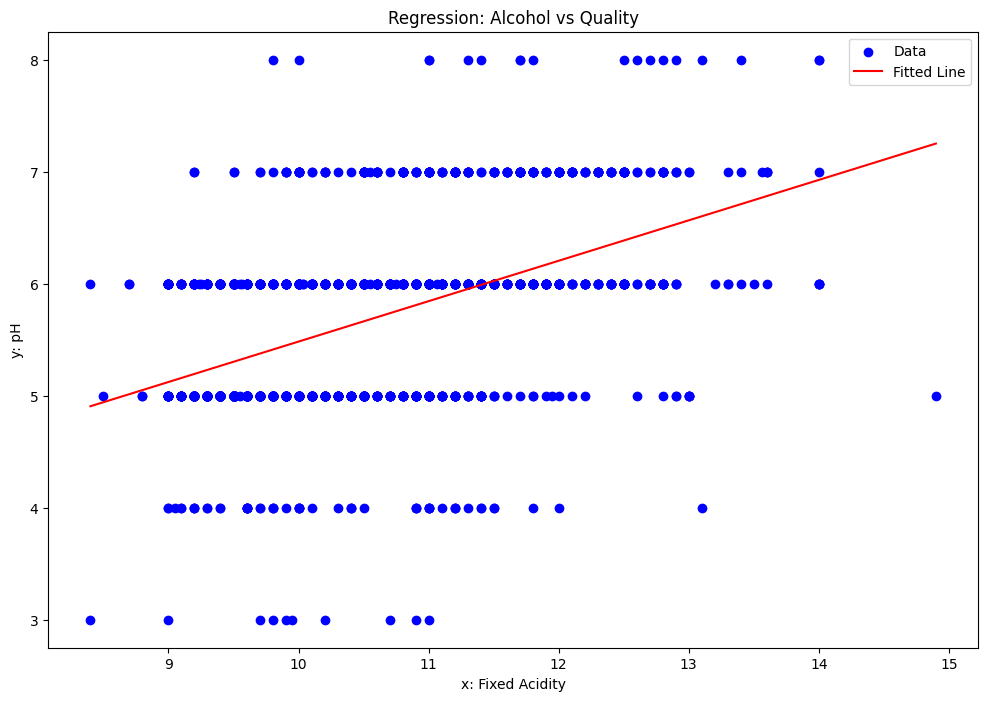

In [5]:
# Plot the data and the fitted line
plt.figure(figsize=(12,8))
plt.scatter(x, y, color='blue', label='Data')

# Cretae a sorted x-range for the fitted line
xQ = np.linspace(x.min(), x.max(), 100)
yQ = intercept + slope * xQ

# Plot the line
plt.plot(xQ, yQ, color='red', label='Fitted Line')

# Annotating the figure
plt.xlabel("x: Fixed Acidity")
plt.ylabel("y: pH")
plt.title("Regression: Alcohol vs Quality")
plt.legend()

### 5.1.2. CLT Consideration

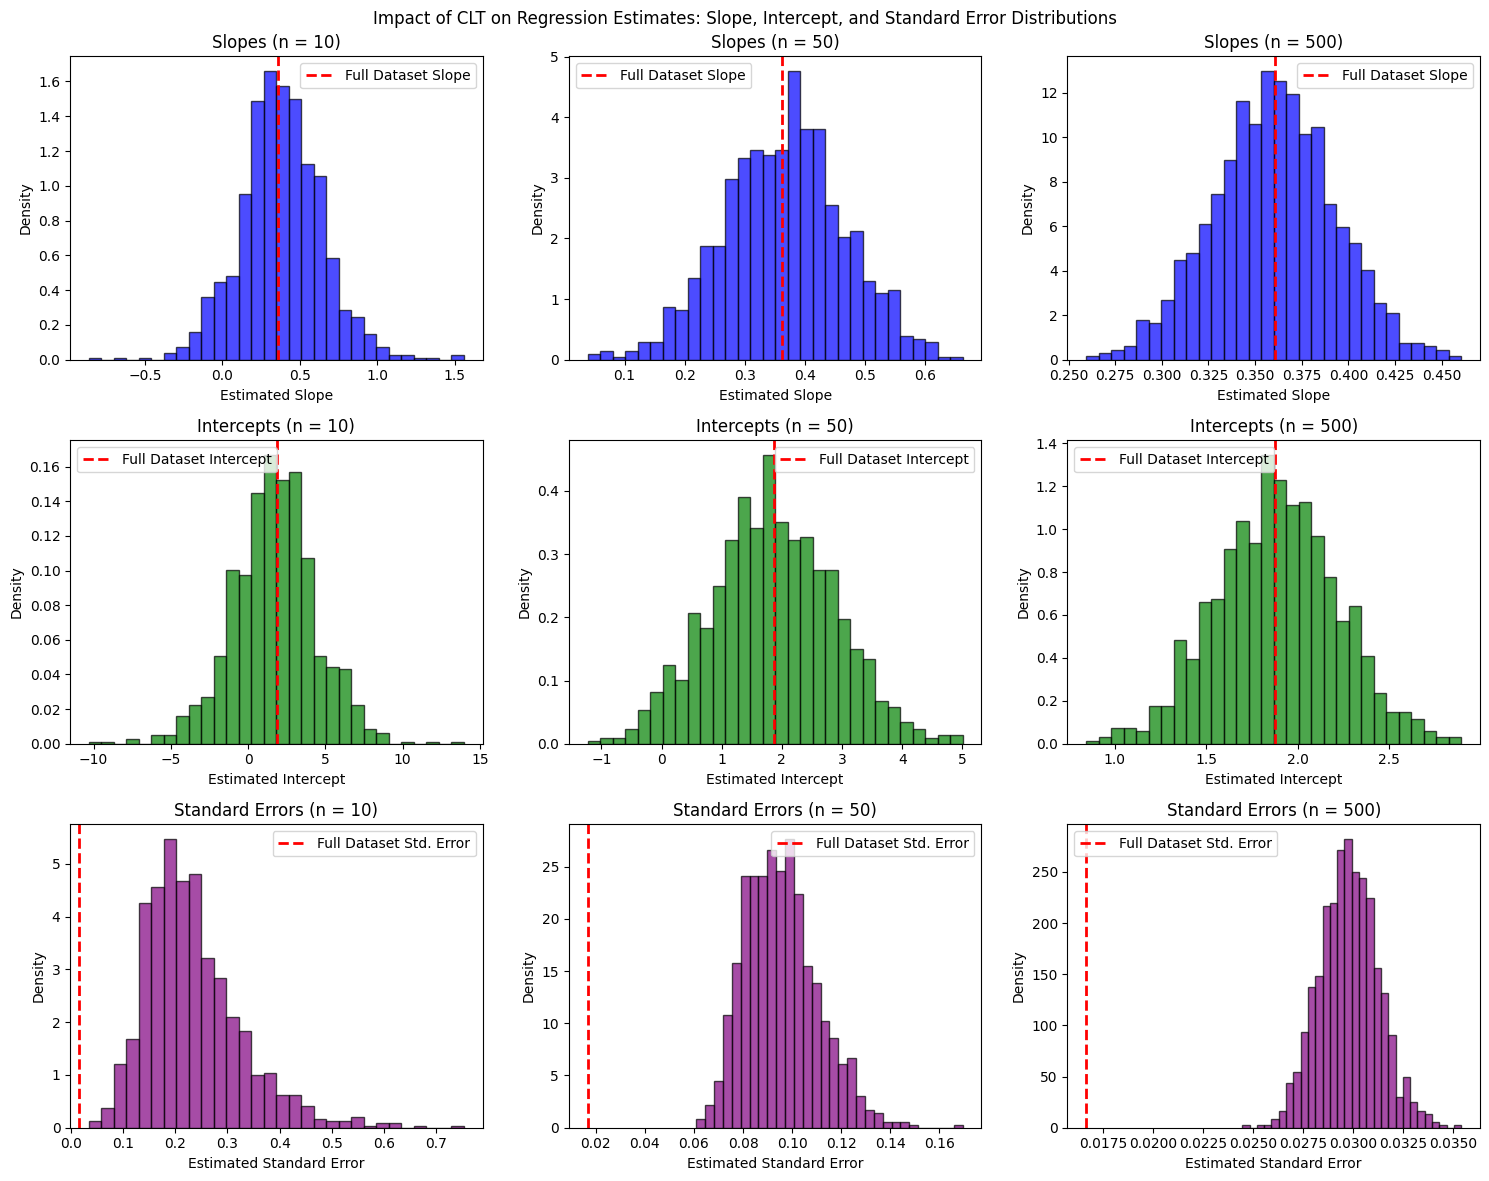

Mean Standard Error for Sample Size 10: 0.2345 (Full Dataset SE: 0.0167)
Mean Standard Error for Sample Size 50: 0.0955 (Full Dataset SE: 0.0167)
Mean Standard Error for Sample Size 500: 0.0298 (Full Dataset SE: 0.0167)


In [6]:
sample_sizes = [10, 50, 500]  # Different sample sizes to test
num_iterations = 1000  # Number of random samples per sample size

# Store estimates for each sample size
regression_estimates = {size: {'slopes': [], 'intercepts': [], 'std_errors': []} for size in sample_sizes}

# Perform random sampling and regression
for size in sample_sizes:
    for _ in range(num_iterations):
        sample_indices = np.random.choice(len(x), size=size, replace=True)
        x_sample, y_sample = x.iloc[sample_indices], y.iloc[sample_indices]
        
        # Fit regression model
        slope_sample, intercept_sample, _, _, std_err_sample = linregress(x_sample, y_sample)
        
        # Store estimates
        regression_estimates[size]['slopes'].append(slope_sample)
        regression_estimates[size]['intercepts'].append(intercept_sample)
        regression_estimates[size]['std_errors'].append(std_err_sample)

# -----------------------------------
# Plot the distributions of estimated slopes, intercepts, and standard errors
# -----------------------------------
fig, axes = plt.subplots(3, len(sample_sizes), figsize=(15, 12))

for i, size in enumerate(sample_sizes):
    # Plot slope distribution
    axes[0, i].hist(regression_estimates[size]['slopes'], bins=30, alpha=0.7, color="blue", edgecolor="black", density=True)
    axes[0, i].axvline(x=slope, color='red', linestyle='dashed', linewidth=2, label="Full Dataset Slope")
    axes[0, i].set_title(f"Slopes (n = {size})")
    axes[0, i].set_xlabel("Estimated Slope")
    axes[0, i].set_ylabel("Density")
    axes[0, i].legend()
    
    # Plot intercept distribution
    axes[1, i].hist(regression_estimates[size]['intercepts'], bins=30, alpha=0.7, color="green", edgecolor="black", density=True)
    axes[1, i].axvline(x=intercept, color='red', linestyle='dashed', linewidth=2, label="Full Dataset Intercept")
    axes[1, i].set_title(f"Intercepts (n = {size})")
    axes[1, i].set_xlabel("Estimated Intercept")
    axes[1, i].set_ylabel("Density")
    axes[1, i].legend()
    
    # Plot standard error distribution
    axes[2, i].hist(regression_estimates[size]['std_errors'], bins=30, alpha=0.7, color="purple", edgecolor="black", density=True)
    axes[2, i].axvline(x=std_err, color='red', linestyle='dashed', linewidth=2, label="Full Dataset Std. Error")
    axes[2, i].set_title(f"Standard Errors (n = {size})")
    axes[2, i].set_xlabel("Estimated Standard Error")
    axes[2, i].set_ylabel("Density")
    axes[2, i].legend()

plt.suptitle("Impact of CLT on Regression Estimates: Slope, Intercept, and Standard Error Distributions")
plt.tight_layout()
plt.show()

# -----------------------------------
# Display mean standard error for each sample size
# -----------------------------------
for size in sample_sizes:
    mean_se = np.mean(regression_estimates[size]['std_errors'])
    print(f"Mean Standard Error for Sample Size {size}: {mean_se:.4f} (Full Dataset SE: {std_err:.4f})")